In [1]:
!pip install plotly==3.8.1
!pip install folium==0.5.0
!pip install cufflinks

  Using cached https://files.pythonhosted.org/packages/34/18/ef96260cb7a68cf613348cc7fe90efa4e32eaf23c46ade7032e6548e25a7/plotly-3.8.1-py2.py3-none-any.whl
  Found existing installation: plotly 4.9.0
    Uninstalling plotly-4.9.0:
      Successfully uninstalled plotly-4.9.0


cufflinks 0.17.3 has requirement plotly>=4.1.1, but you'll have plotly 3.8.1 which is incompatible.


  Using cached https://files.pythonhosted.org/packages/bf/5f/47ab0d9d843c5be0f5c5bd891736a4c84fa45c3b0a0ddb6b6df7c098c66f/plotly-4.9.0-py2.py3-none-any.whl
  Found existing installation: plotly 3.8.1
    Uninstalling plotly-3.8.1:
      Successfully uninstalled plotly-3.8.1


In [2]:
#from bs4 import BeautifulSoup
#import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import json
import folium
from pandas import DataFrame
from pandas import ExcelFile
#pandas 사용을 위한 import

In [3]:
df_bundang = pd.read_excel("result.xlsx",encoding='utf-8')
#최초의 파일, 각 시간별 승차인원, 하차인원이 포함되어 있음
df_bundang.head(3)

,사용월,역순서,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202001,0,수원,936,2,4187,565,7793,2984,23338,...,5597,4031,149,1857,0,7,0,0,0,0
1,202001,1,매교,354,27,2071,373,3172,1052,6803,...,321,2081,31,571,0,2,0,0,0,0
2,202001,2,수원시청,520,5,7287,1510,11069,4728,23163,...,8698,12506,773,3232,0,6,0,0,0,0


In [4]:
col_rushhour=[]
h=[7,8,9]
on_off=['승','하']
for i in h :
    col_rushhour.append(str(i).zfill(2)+'시-'+str((i+1)).zfill(2)+'시 '+on_off[0]+'차인원')
    col_rushhour.append(str(i).zfill(2)+'시-'+str((i+1)).zfill(2)+'시 '+on_off[-1]+'차인원')
       
col_rushhour = ['사용월','역순서','지하철역'] + col_rushhour
col_rushhour
#필요 Attribute 만 취하기 위해 필요 Attribute만이 들어있는 list 생성

['사용월',
 '역순서',
 '지하철역',
 '07시-08시 승차인원',
 '07시-08시 하차인원',
 '08시-09시 승차인원',
 '08시-09시 하차인원',
 '09시-10시 승차인원',
 '09시-10시 하차인원']

In [5]:
df_bundang_rushhour = df_bundang[col_rushhour]
df_bundang_rushhour.head(3)
#list를 이용해 필요 Attribute만 뽑아서 새로운 변수로 지정

,사용월,역순서,지하철역,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원
0,202001,0,수원,23338,6699,28155,10382,15131,7945
1,202001,1,매교,6803,2274,7979,6720,5187,3755
2,202001,2,수원시청,23163,11756,22549,41618,13121,29161


In [6]:
col_rushhour_diff =[str(i).zfill(2)+'시-'+str((i+1)).zfill(2)+'시 증감인원' for i in h]
col_rushhour_diff
#새로운 Attribute를 추가 하기 위한 list 생성

['07시-08시 증감인원', '08시-09시 증감인원', '09시-10시 증감인원']

In [7]:
for index, value in enumerate(col_rushhour_diff) :
    df_bundang_rushhour[col_rushhour_diff[index]] = df_bundang_rushhour[col_rushhour[2*index+3]] - df_bundang_rushhour[col_rushhour[2*index+4]]
df_bundang_rushhour.head(5)
# [n시-(n+1)시 승차인원] - [n시-(n+1)시 하차인원] = n시-(n+1시) 증감인원 Attribute 추가

C:\Users\8\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,사용월,역순서,지하철역,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,07시-08시 증감인원,08시-09시 증감인원,09시-10시 증감인원
0,202001,0,수원,23338,6699,28155,10382,15131,7945,16639,17773,7186
1,202001,1,매교,6803,2274,7979,6720,5187,3755,4529,1259,1432
2,202001,2,수원시청,23163,11756,22549,41618,13121,29161,11407,-19069,-16040
3,202001,3,매탄권선,16502,3449,17121,7611,9866,4869,13053,9510,4997
4,202001,4,망포,45586,18761,43492,38963,23435,15412,26825,4529,8023


In [8]:
df_bundang_rushhour.to_excel('bundang_rushhour.xlsx')
#총 인원 추가와 필요없는 Tuple 삭제를 엑셀 작업으로 하기 위해 xslx로 저장

In [9]:
df_bundang_rushhour_total = pd.read_excel('bundang_rushhour_uselessstationelemination.xlsx', index=True)
#총 인원 추가, 필요없는 Tuple 삭제를 엑셀로 작업 후 다시 DataFrame으로 만듦
df_bundang_rushhour_total.head(4)

,사용월,역순서,지하철역,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,07시-08시 증감인원,08시-09시 증감인원,09시-10시 증감인원,07시-08시 총 인원,08시-09시 총 인원,09시-10시 총 인원
0,202001,0,수원,23338,6699,28155,10382,15131,7945,16639,17773,7186,16639,17773,7186
1,202001,1,매교,6803,2274,7979,6720,5187,3755,4529,1259,1432,21168,19032,8618
2,202001,2,수원시청,23163,11756,22549,41618,13121,29161,11407,-19069,-16040,32575,-37,-7422
3,202001,3,매탄권선,16502,3449,17121,7611,9866,4869,13053,9510,4997,45628,9473,-2425


In [10]:
col_rushhour_tot =col_rushhour[:3] + [str(i).zfill(2)+'시-'+str((i+1)).zfill(2)+'시 총 인원' for i in h]
col_rushhour_tot

['사용월', '역순서', '지하철역', '07시-08시 총 인원', '08시-09시 총 인원', '09시-10시 총 인원']

In [11]:
col = col_rushhour[:3] + col_rushhour_diff + col_rushhour_tot[3:]
df_bundang_rushhour_diff_tot = df_bundang_rushhour_total[col]
df_bundang_rushhour_diff_tot.head(4)
#다시 한번 xlsx에서 승차인원, 하차인원 제거 한 나머지 필요 Attribute만 취득 후 새 변수명 지정

,사용월,역순서,지하철역,07시-08시 증감인원,08시-09시 증감인원,09시-10시 증감인원,07시-08시 총 인원,08시-09시 총 인원,09시-10시 총 인원
0,202001,0,수원,16639,17773,7186,16639,17773,7186
1,202001,1,매교,4529,1259,1432,21168,19032,8618
2,202001,2,수원시청,11407,-19069,-16040,32575,-37,-7422
3,202001,3,매탄권선,13053,9510,4997,45628,9473,-2425


In [12]:
col_rushhour_tot =[str(i).zfill(2)+'시-'+str((i+1)).zfill(2)+'시 총 인원' for i in h]
col_rushhour_tot
#시간 별 총 인원 Attribute를 찾기 위한 list 생성

['07시-08시 총 인원', '08시-09시 총 인원', '09시-10시 총 인원']

In [13]:
df_bundang_rushhour_forcalc = df_bundang_rushhour_diff_tot[col_rushhour_tot].astype('float64')
df_bundang_rushhour_forcalc.head(3)
#연산을 위한 int -> floating 진행

,07시-08시 총 인원,08시-09시 총 인원,09시-10시 총 인원
0,16639.0,17773.0,7186.0
1,21168.0,19032.0,8618.0
2,32575.0,-37.0,-7422.0


In [14]:
# df_bundang_rushhour_diff_tot[df_bundang_rushhour_diff_tot[col_rushhour_tot] <0]
df_bundang_rushhour_forcalc[ df_bundang_rushhour_forcalc[col_rushhour_tot] < 0 ] = abs(df_bundang_rushhour_forcalc[col_rushhour_tot])
df_bundang_rushhour_forcalc.head(3)

,07시-08시 총 인원,08시-09시 총 인원,09시-10시 총 인원
0,16639.0,17773.0,7186.0
1,21168.0,19032.0,8618.0
2,32575.0,37.0,7422.0


In [15]:
for i in col_rushhour_tot:
    del df_bundang_rushhour_diff_tot[i] 
# [del df_bundang_rushhour_diff_tot[i] for i in col_rushhour_tot]
df_bundang_rushhour_diff_tot.head(2)
# 계산이 불가능한 '07시-08시 총 인원', '08시-09시 총 인원', '09시-10시 총 인원' Attribute 삭제

,사용월,역순서,지하철역,07시-08시 증감인원,08시-09시 증감인원,09시-10시 증감인원
0,202001,0,수원,16639,17773,7186
1,202001,1,매교,4529,1259,1432


In [16]:
df_bundang_rushhour_diff_tot = df_bundang_rushhour_diff_tot.join(df_bundang_rushhour_forcalc)
df_bundang_rushhour_diff_tot.head(6)

,사용월,역순서,지하철역,07시-08시 증감인원,08시-09시 증감인원,09시-10시 증감인원,07시-08시 총 인원,08시-09시 총 인원,09시-10시 총 인원
0,202001,0,수원,16639,17773,7186,16639.0,17773.0,7186.0
1,202001,1,매교,4529,1259,1432,21168.0,19032.0,8618.0
2,202001,2,수원시청,11407,-19069,-16040,32575.0,37.0,7422.0
3,202001,3,매탄권선,13053,9510,4997,45628.0,9473.0,2425.0
4,202001,4,망포,26825,4529,8023,72453.0,14002.0,5598.0
5,202001,5,영통,8684,-3614,-4287,81137.0,10388.0,1311.0


In [17]:
# # df_bundang_rushhour_diff_tot[df_bundang_rushhour_diff_tot[col_rushhour_tot] <0]
# df_bundang_rushhour_diff_tot[ df_bundang_rushhour_diff_tot[col_rushhour_tot] < 0 ] = 0

In [18]:
df_bundang_rushhour_diff_tot['07시-08시 혼잡도'] = df_bundang_rushhour_diff_tot['07시-08시 총 인원']/11520 * 100
df_bundang_rushhour_diff_tot['08시-09시 혼잡도'] = df_bundang_rushhour_diff_tot['08시-09시 총 인원']/8640 * 100
df_bundang_rushhour_diff_tot['09시-10시 혼잡도'] = df_bundang_rushhour_diff_tot['09시-10시 총 인원']/7680 * 100

#혼잡도 공식
#1량 = 160명이 100%, 100% 넘으면 점점 좁아짐
#분당선은 차량당 6량 ∴ 960명이 100%
#7시-8시 시간당 12대, 8시-9시 시간당 9대, 9시-10시 시간당 8대, 왕복으로인한 *2
#7시-8시 시간당 24대, 8시-9시 시간당 18대, 9시-10시 시간당 16대
#7시-8시 11,520명, 8시-9시 8,640명, 9시-10시 7,680명이 100%
#
df_bundang_rushhour_diff_tot.head(10)

,사용월,역순서,지하철역,07시-08시 증감인원,08시-09시 증감인원,09시-10시 증감인원,07시-08시 총 인원,08시-09시 총 인원,09시-10시 총 인원,07시-08시 혼잡도,08시-09시 혼잡도,09시-10시 혼잡도
0,202001,0,수원,16639,17773,7186,16639.0,17773.0,7186.0,144.435764,205.706019,93.567708
1,202001,1,매교,4529,1259,1432,21168.0,19032.0,8618.0,183.750000,220.277778,112.213542
2,202001,2,수원시청,11407,-19069,-16040,32575.0,37.0,7422.0,282.769097,0.428241,96.640625
3,202001,3,매탄권선,13053,9510,4997,45628.0,9473.0,2425.0,396.076389,109.641204,31.575521
4,202001,4,망포,26825,4529,8023,72453.0,14002.0,5598.0,628.932292,162.060185,72.890625
5,202001,5,영통,8684,-3614,-4287,81137.0,10388.0,1311.0,704.314236,120.231481,17.070312
6,202001,6,청명,11564,9822,5416,92701.0,20210.0,6727.0,804.696181,233.912037,87.591146
7,202001,7,상갈,12489,12167,9585,105190.0,32377.0,16312.0,913.107639,374.733796,212.395833
8,202001,8,기흥,28576,26737,13490,133766.0,59114.0,29802.0,1161.163194,684.189815,388.046875
9,202001,9,신갈,15437,14028,9124,149203.0,73142.0,38926.0,1295.164931,846.550926,506.848958


In [19]:
df_bundang_rushhour_diff_tot['07시-08시 혼잡도'].max()

1986.640625

In [20]:
df_bundang_rushhour_diff_tot['07시-08시 혼잡도_norm'] = df_bundang_rushhour_diff_tot['07시-08시 혼잡도']/8.634782608695652
df_bundang_rushhour_diff_tot['08시-09시 혼잡도_norm'] = df_bundang_rushhour_diff_tot['08시-09시 혼잡도']/8.634782608695652
df_bundang_rushhour_diff_tot['09시-10시 혼잡도_norm'] = df_bundang_rushhour_diff_tot['09시-10시 혼잡도']/8.634782608695652

#Normalization,  df_bundang_rushhour_diff_tot['07시-08시 혼잡도'].max() = 1986.640625 이를 230%로 맞춰주기 위해 전부 같은 값으로 나눈다.
df_bundang_rushhour_diff_tot

,사용월,역순서,지하철역,07시-08시 증감인원,08시-09시 증감인원,09시-10시 증감인원,07시-08시 총 인원,08시-09시 총 인원,09시-10시 총 인원,07시-08시 혼잡도,08시-09시 혼잡도,09시-10시 혼잡도,07시-08시 혼잡도_norm,08시-09시 혼잡도_norm,09시-10시 혼잡도_norm
0,202001,0,수원,16639,17773,7186,16639.0,17773.0,7186.0,144.435764,205.706019,93.567708,16.727203,23.822953,10.836139
1,202001,1,매교,4529,1259,1432,21168.0,19032.0,8618.0,183.750000,220.277778,112.213542,21.280211,25.510518,12.995526
2,202001,2,수원시청,11407,-19069,-16040,32575.0,37.0,7422.0,282.769097,0.428241,96.640625,32.747680,0.049595,11.192016
3,202001,3,매탄권선,13053,9510,4997,45628.0,9473.0,2425.0,396.076389,109.641204,31.575521,45.869874,12.697622,3.656782
4,202001,4,망포,26825,4529,8023,72453.0,14002.0,5598.0,628.932292,162.060185,72.890625,72.837073,18.768299,8.441512
5,202001,5,영통,8684,-3614,-4287,81137.0,10388.0,1311.0,704.314236,120.231481,17.070312,81.567107,13.924089,1.976924
6,202001,6,청명,11564,9822,5416,92701.0,20210.0,6727.0,804.696181,233.912037,87.591146,93.192408,27.089511,10.143990
7,202001,7,상갈,12489,12167,9585,105190.0,32377.0,16312.0,913.107639,374.733796,212.395833,105.747612,43.398174,24.597705
8,202001,8,기흥,28576,26737,13490,133766.0,59114.0,29802.0,1161.163194,684.189815,388.046875,134.475093,79.236484,44.939970
9,202001,9,신갈,15437,14028,9124,149203.0,73142.0,38926.0,1295.164931,846.550926,506.848958,149.993924,98.039634,58.698520


In [21]:
df_bundang_rushhour_diff_tot.to_excel('bundang_normalization.xlsx')

In [22]:
# df_bundang_rushhour_diff_tot['07시-08시 혼잡도_norm'] = df_bundang_rushhour_diff_tot['07시-08시 혼잡도']/8.634782608695652
# df_bundang_rushhour_diff_tot['08시-09시 혼잡도_norm'] = df_bundang_rushhour_diff_tot['08시-09시 혼잡도']/5.4381038647343
# df_bundang_rushhour_diff_tot['09시-10시 혼잡도_norm'] = df_bundang_rushhour_diff_tot['09시-10시 혼잡도']/3.390058876811594

# #Normalization,  df_bundang_rushhour_diff_tot['07시-08시 혼잡도'].max() = 1986.640625 이를 230%로 맞춰주기 위해 전부 같은 값으로 나눈다.
# df_bundang_rushhour_diff_tot

In [23]:
col_jam = col_rushhour[:3] + [str(i).zfill(2)+'시-'+str((i+1)).zfill(2)+'시 혼잡도_norm' for i in h]
df_jam = df_bundang_rushhour_diff_tot[col_jam]
df_jam.head(2)

,사용월,역순서,지하철역,07시-08시 혼잡도_norm,08시-09시 혼잡도_norm,09시-10시 혼잡도_norm
0,202001,0,수원,16.727203,23.822953,10.836139
1,202001,1,매교,21.280211,25.510518,12.995526


In [126]:
df_jam_1 = df_jam[df_jam['사용월']==202001]
df_jam_2 = df_jam[df_jam['사용월']==202002]
df_jam_3 = df_jam[df_jam['사용월']==202003]
df_jam_4 = df_jam[df_jam['사용월']==202004]
df_jam_5 = df_jam[df_jam['사용월']==202005]
df_jam_6 = df_jam[df_jam['사용월']==202006]
df_jam_1

,사용월,역순서,지하철역,07시-08시 혼잡도_norm,08시-09시 혼잡도_norm,09시-10시 혼잡도_norm
0,202001,0,수원,16.727203,23.822953,10.836139
1,202001,1,매교,21.280211,25.510518,12.995526
2,202001,2,수원시청,32.747680,0.049595,11.192016
3,202001,3,매탄권선,45.869874,12.697622,3.656782
4,202001,4,망포,72.837073,18.768299,8.441512
5,202001,5,영통,81.567107,13.924089,1.976924
6,202001,6,청명,93.192408,27.089511,10.143990
7,202001,7,상갈,105.747612,43.398174,24.597705
8,202001,8,기흥,134.475093,79.236484,44.939970
9,202001,9,신갈,149.993924,98.039634,58.698520


In [25]:
print (df_jam_1.columns)

Index(['사용월', '역순서', '지하철역', '07시-08시 혼잡도_norm', '08시-09시 혼잡도_norm',
       '09시-10시 혼잡도_norm'],
      dtype='object')


In [26]:
%matplotlib inline 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# font_name
rc('font', family=font_name)
# matplotlib의 한글문제를 해결

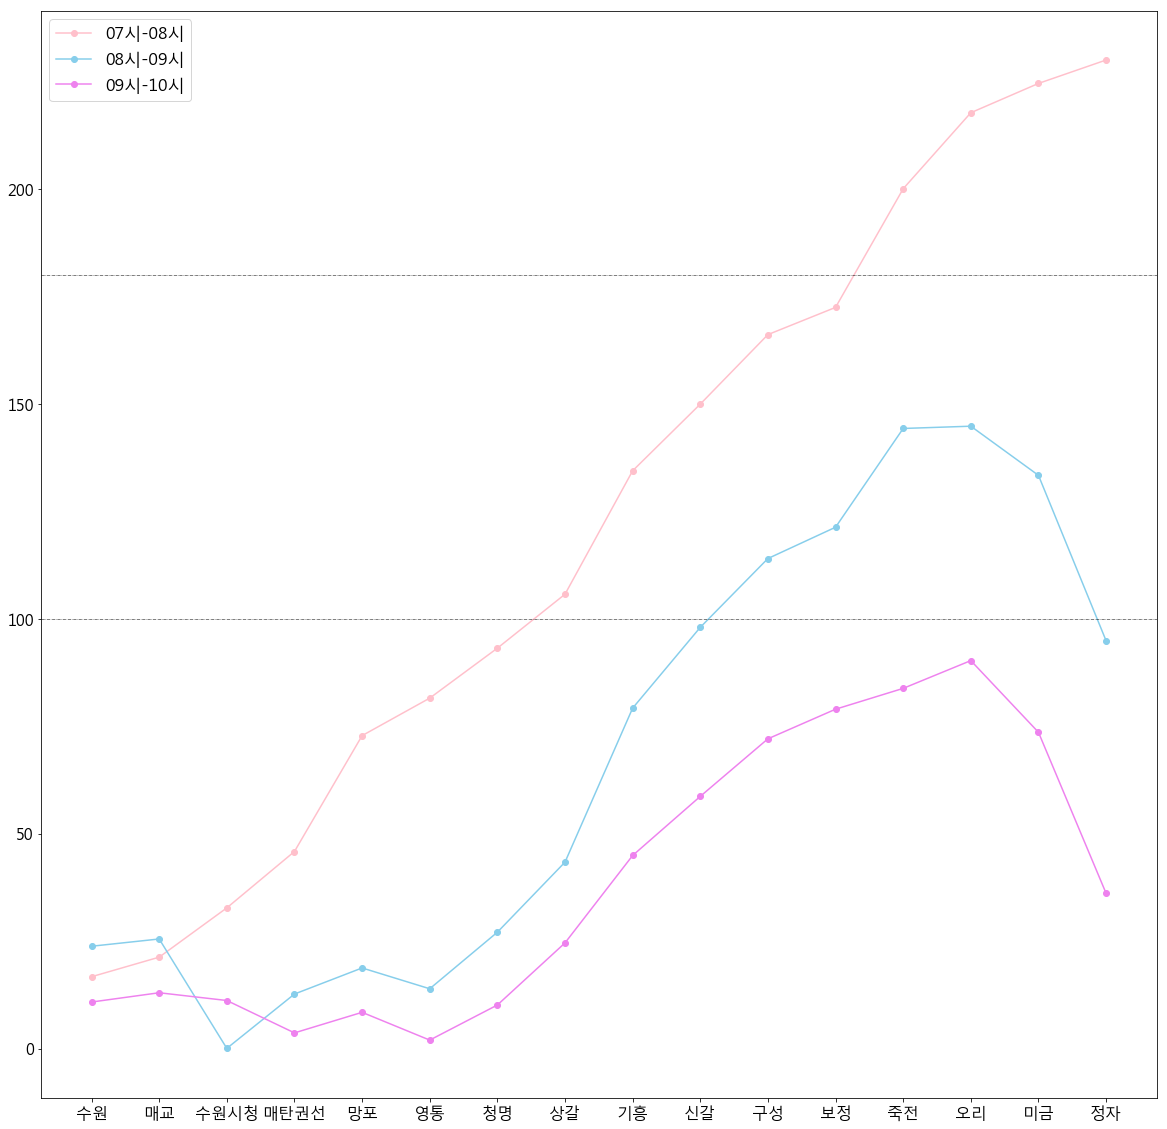

In [27]:
plt.figure(figsize=(20,20))
plt.plot(df_jam_1['지하철역'],df_jam_1['07시-08시 혼잡도_norm'], marker='o',color='pink')
plt.plot(df_jam_1['지하철역'],df_jam_1['08시-09시 혼잡도_norm'], marker='o',color='skyblue')
plt.plot(df_jam_1['지하철역'],df_jam_1['09시-10시 혼잡도_norm'], marker='o',color='violet')
plt.legend(['07시-08시', '08시-09시','09시-10시'], loc=0, fontsize = 'xx-large')
plt.axhline(y=100, color='black', linewidth=0.5,linestyle='-.')
plt.axhline(y=180, color='black', linewidth=0.5,linestyle='-.')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

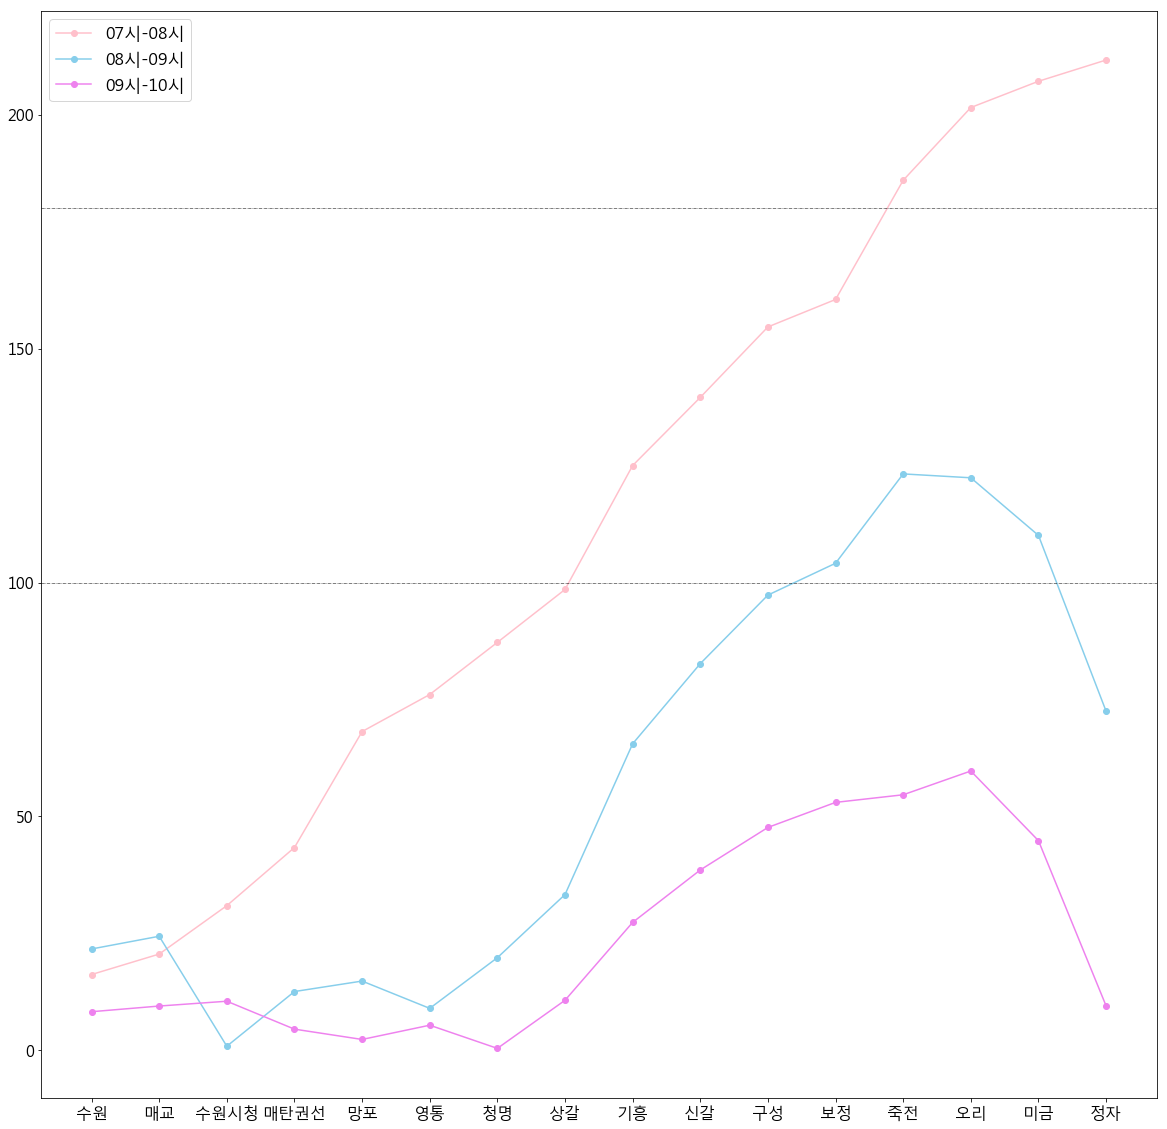

In [28]:
plt.figure(figsize=(20,20))
plt.plot(df_jam_2['지하철역'],df_jam_2['07시-08시 혼잡도_norm'], marker='o',color='pink')
plt.plot(df_jam_2['지하철역'],df_jam_2['08시-09시 혼잡도_norm'], marker='o',color='skyblue')
plt.plot(df_jam_2['지하철역'],df_jam_2['09시-10시 혼잡도_norm'], marker='o',color='violet')
plt.legend(['07시-08시', '08시-09시','09시-10시'], loc=0, fontsize = 'xx-large')
plt.axhline(y=100, color='black', linewidth=0.5,linestyle='-.')
plt.axhline(y=180, color='black', linewidth=0.5,linestyle='-.')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

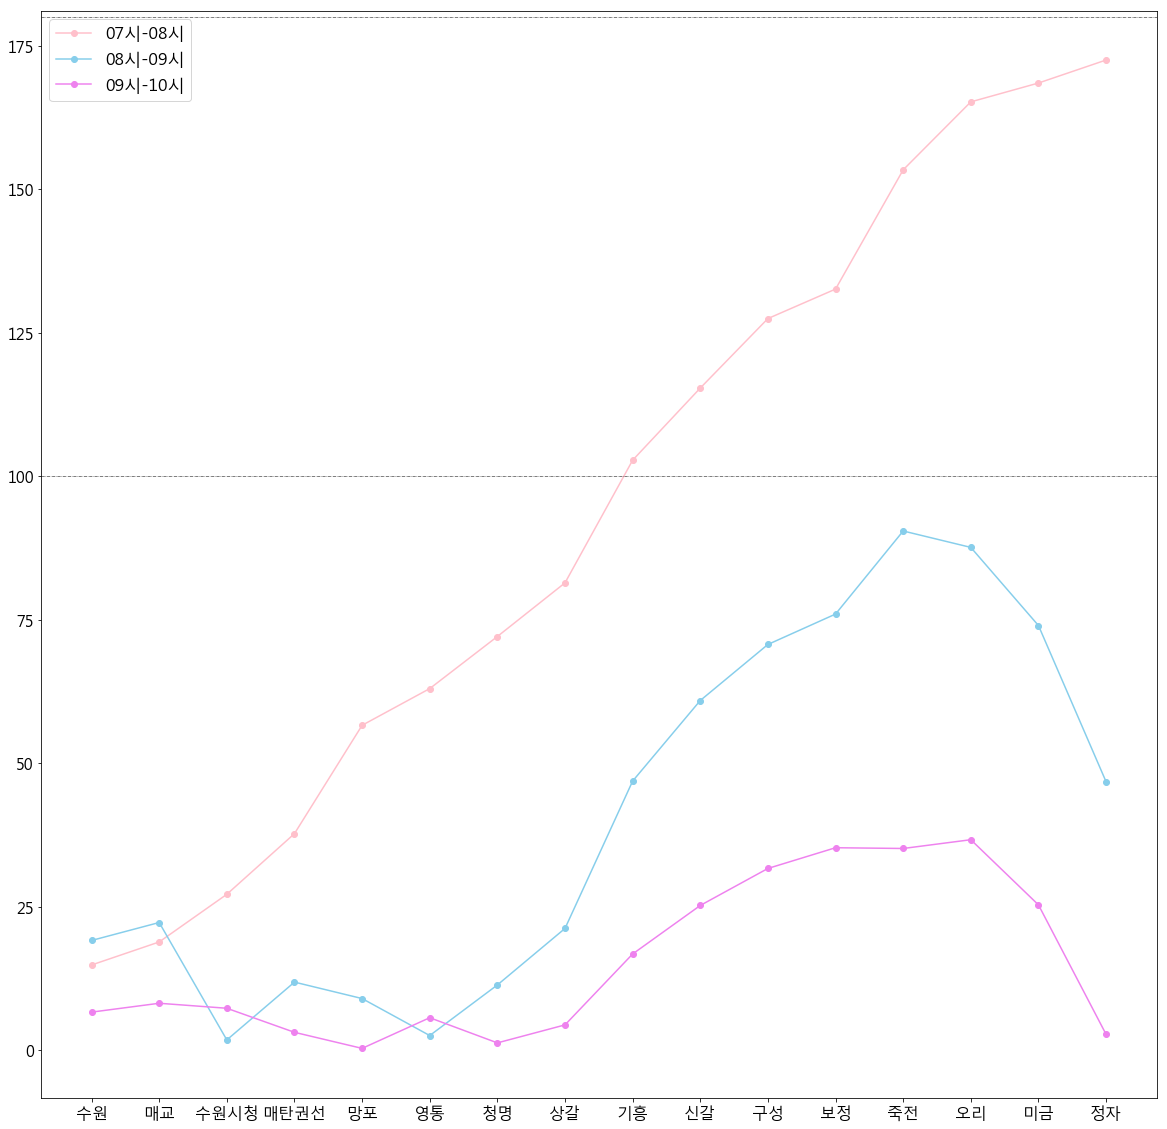

In [29]:
plt.figure(figsize=(20,20))
plt.plot(df_jam_3['지하철역'],df_jam_3['07시-08시 혼잡도_norm'], marker='o',color='pink')
plt.plot(df_jam_3['지하철역'],df_jam_3['08시-09시 혼잡도_norm'], marker='o',color='skyblue')
plt.plot(df_jam_3['지하철역'],df_jam_3['09시-10시 혼잡도_norm'], marker='o',color='violet')
plt.legend(['07시-08시', '08시-09시','09시-10시'], loc=0, fontsize = 'xx-large')
plt.axhline(y=100, color='black', linewidth=0.5,linestyle='-.')
plt.axhline(y=180, color='black', linewidth=0.5,linestyle='-.')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

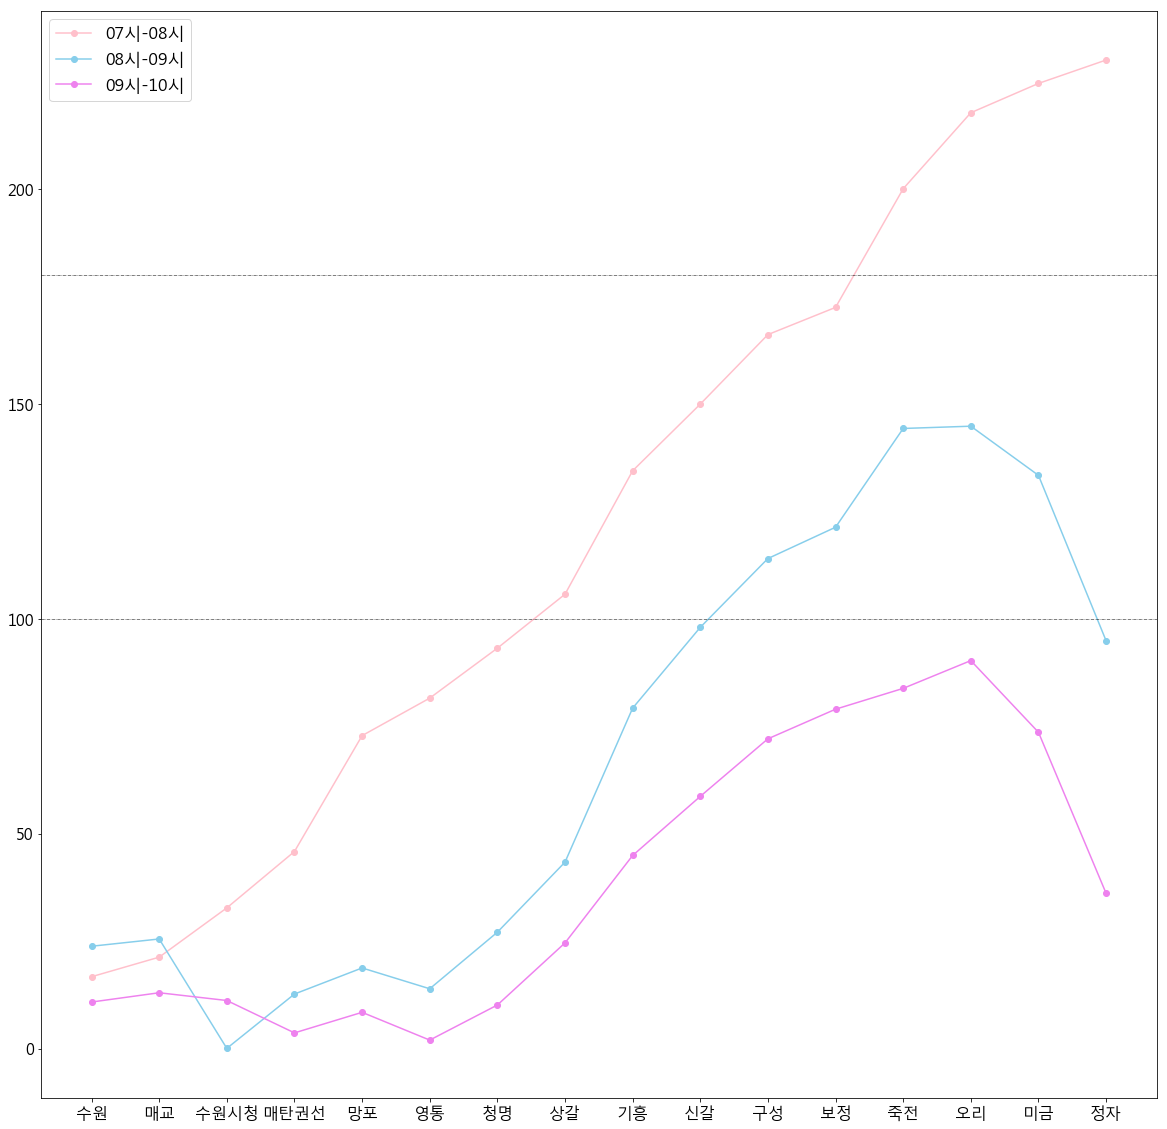

In [30]:
plt.figure(figsize=(20,20))
plt.plot(df_jam_1['지하철역'],df_jam_1['07시-08시 혼잡도_norm'], marker='o',color='pink')
plt.plot(df_jam_1['지하철역'],df_jam_1['08시-09시 혼잡도_norm'], marker='o',color='skyblue')
plt.plot(df_jam_1['지하철역'],df_jam_1['09시-10시 혼잡도_norm'], marker='o',color='violet')
plt.legend(['07시-08시', '08시-09시','09시-10시'], loc=0, fontsize = 'xx-large')
plt.axhline(y=100, color='black', linewidth=0.5,linestyle='-.')
plt.axhline(y=180, color='black', linewidth=0.5,linestyle='-.')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

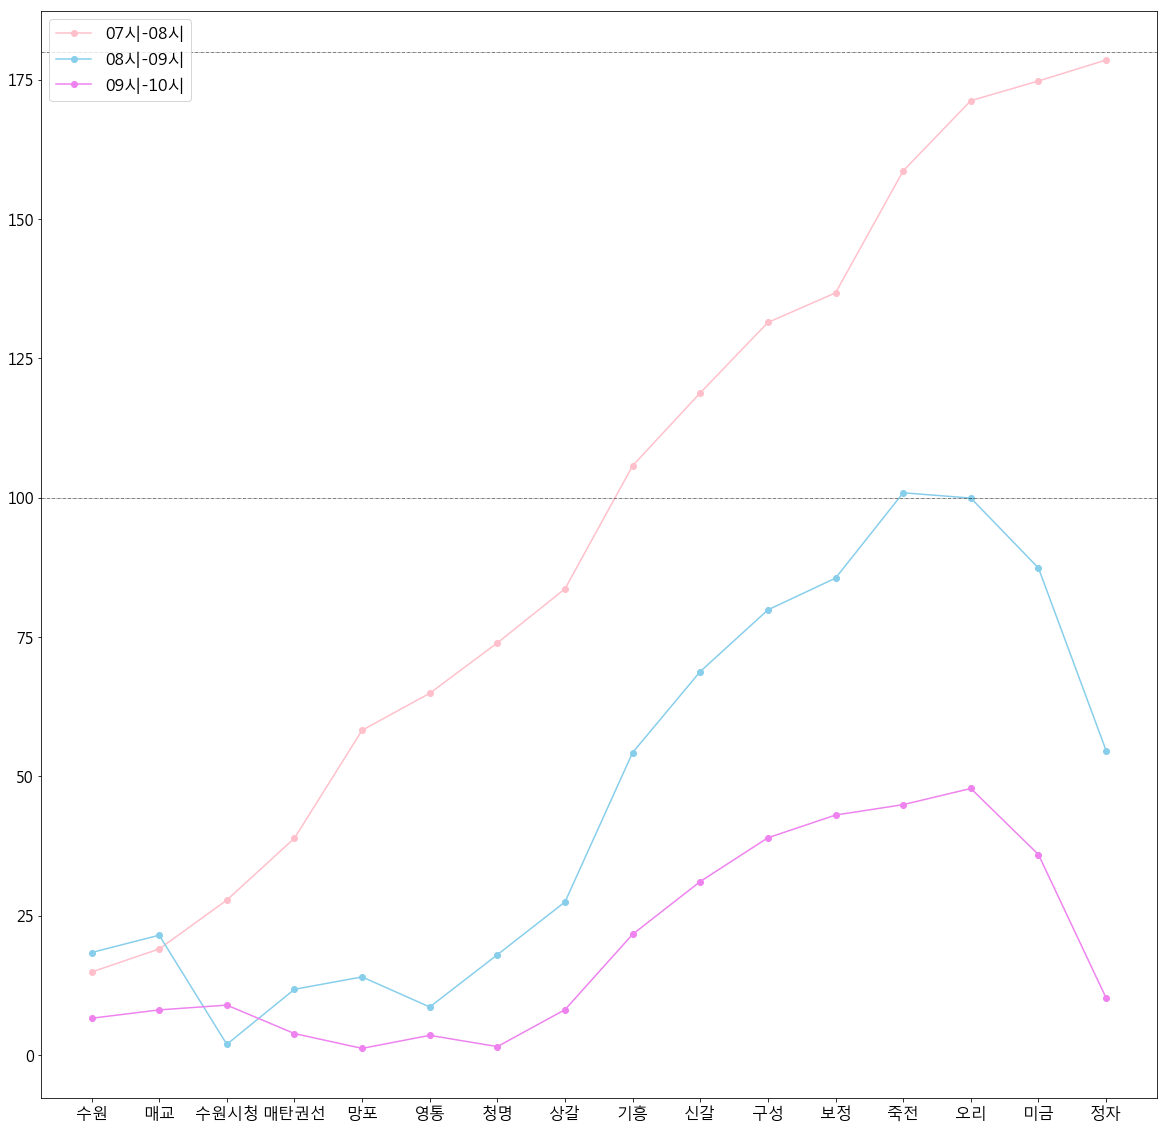

In [136]:
plt.figure(figsize=(20,20))
plt.plot(df_jam_4['지하철역'],df_jam_4['07시-08시 혼잡도_norm'], marker='o',color='pink')
plt.plot(df_jam_4['지하철역'],df_jam_4['08시-09시 혼잡도_norm'], marker='o',color='skyblue')
plt.plot(df_jam_4['지하철역'],df_jam_4['09시-10시 혼잡도_norm'], marker='o',color='violet')
plt.legend(['07시-08시', '08시-09시','09시-10시'], loc=2, fontsize = 'xx-large')
plt.axhline(y=100, color='black', linewidth=0.5,linestyle='-.')
plt.axhline(y=180, color='black', linewidth=0.5,linestyle='-.')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

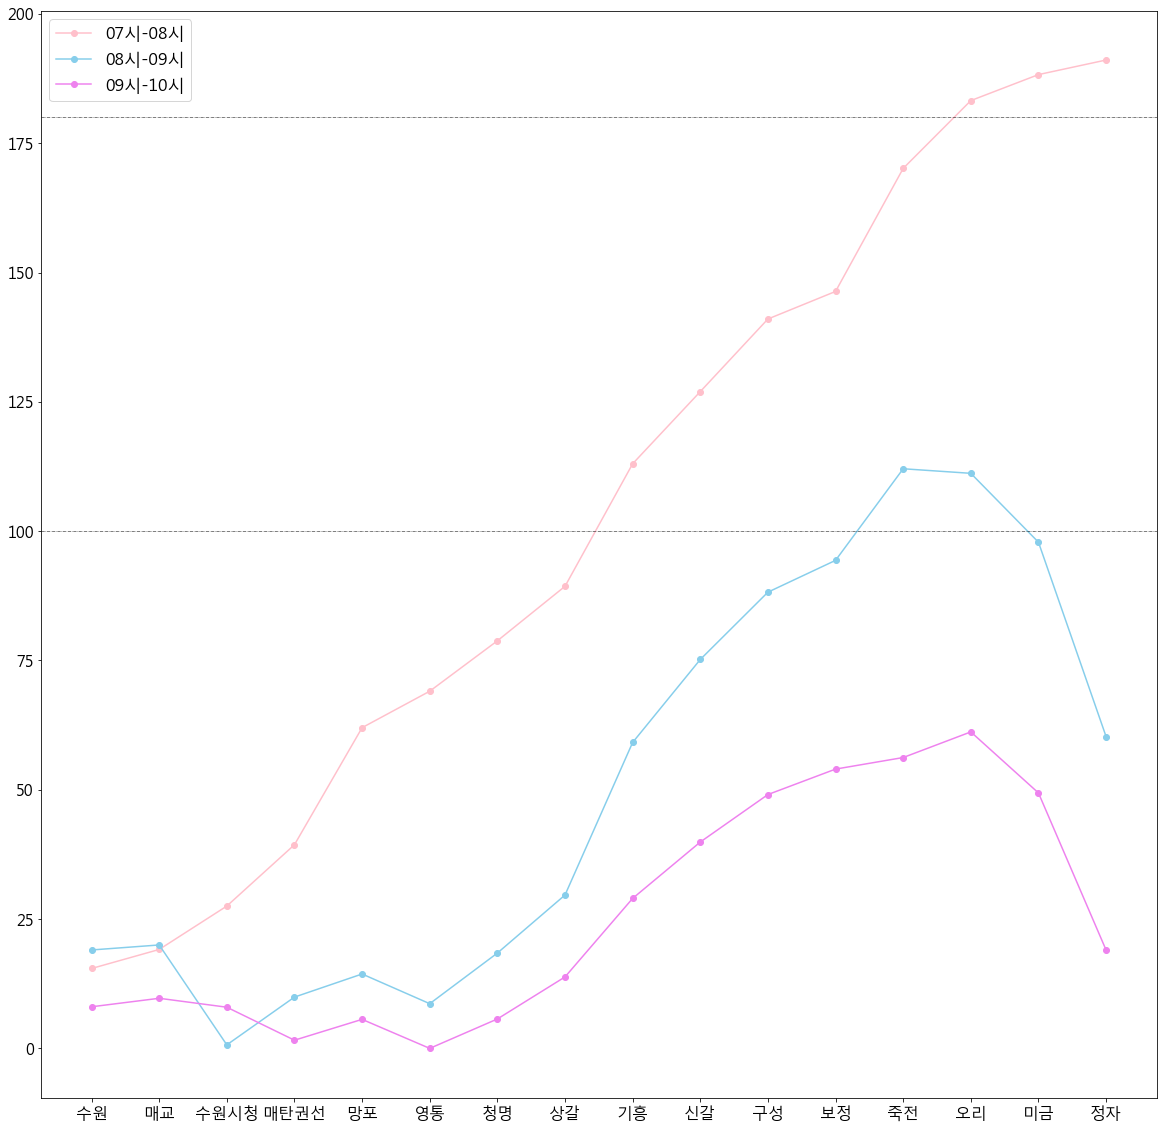

In [32]:
plt.figure(figsize=(20,20))
plt.plot(df_jam_5['지하철역'],df_jam_5['07시-08시 혼잡도_norm'], marker='o',color='pink')
plt.plot(df_jam_5['지하철역'],df_jam_5['08시-09시 혼잡도_norm'], marker='o',color='skyblue')
plt.plot(df_jam_5['지하철역'],df_jam_5['09시-10시 혼잡도_norm'], marker='o',color='violet')
plt.legend(['07시-08시', '08시-09시','09시-10시'], loc=0, fontsize = 'xx-large')
plt.axhline(y=100, color='black', linewidth=0.5,linestyle='-.')
plt.axhline(y=180, color='black', linewidth=0.5,linestyle='-.')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

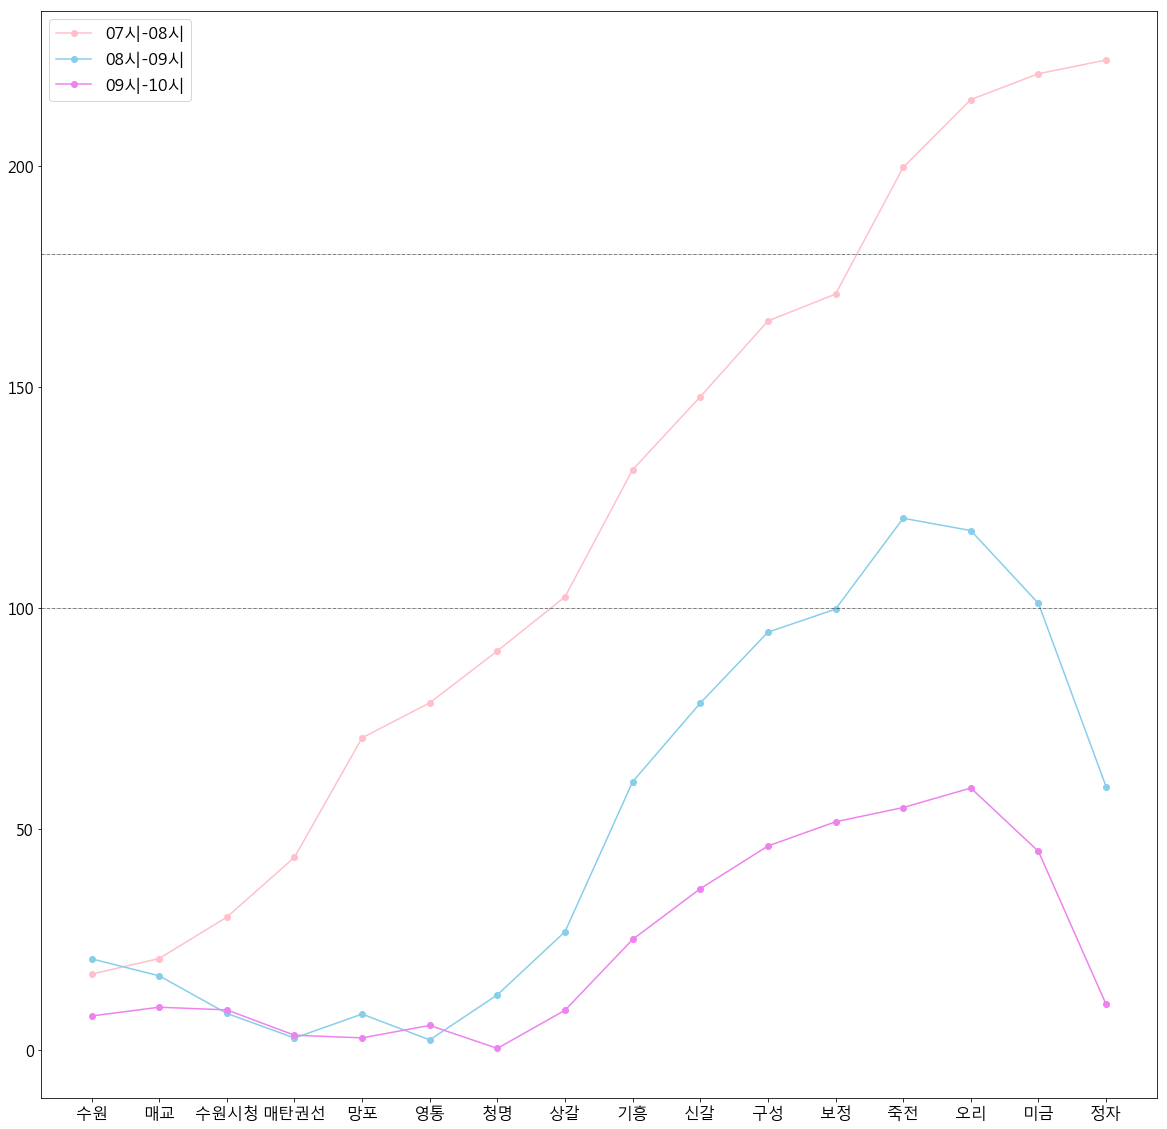

In [33]:
plt.figure(figsize=(20,20))
plt.plot(df_jam_6['지하철역'],df_jam_6['07시-08시 혼잡도_norm'], marker='o',color='pink')
plt.plot(df_jam_6['지하철역'],df_jam_6['08시-09시 혼잡도_norm'], marker='o',color='skyblue')
plt.plot(df_jam_6['지하철역'],df_jam_6['09시-10시 혼잡도_norm'], marker='o',color='violet')
plt.legend(['07시-08시', '08시-09시','09시-10시'], loc=0, fontsize = 'xx-large')
plt.axhline(y=100, color='black', linewidth=0.5,linestyle='-.')
plt.axhline(y=180, color='black', linewidth=0.5,linestyle='-.')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [34]:
# plt.figure(figsize=(20, 20))
# plt.plot(df_jam_1['지하철역'], df_jam_1['07시-08시 혼잡도_norm'], marker='o',color='pink')
# plt.plot(df_jam_1['지하철역'], df_jam_1['08시-09시 혼잡도_norm'], marker='o',color='skyblue')
# plt.plot(df_jam_1['지하철역'], df_jam_1['09시-10시 혼잡도_norm'], marker='o',color='violet')
# plt.legend(['07시-08시', '08시-09시','09시-10시'], loc=0, fontsize = 'xx-large')
# plt.grid()
# plt.axhspan(0, 100, facecolor='green', alpha=0.5)
# plt.axhspan(100, 180, facecolor='yellow', alpha=0.5)
# plt.axhspan(180, 230, facecolor='red', alpha=0.5)
# plt.show()

In [112]:
bundang = {'경도' : [126.999320,127.015650,127.029927,127.040285,127.056828,127.071315,127.079292,127.108912,127.115896,127.111318,127.105691,127.108341,127.107414,127.108947,127.108904,127.108068],
     '위도' : [37.265967,37.265500,37.262102,37.253182,37.245747,37.251488,37.259791,37.261843,37.275071,37.286031,37.298980,37.312830,37.324821,37.339754,37.350030,37.366047,]}


bundang=DataFrame(bundang)

bundang

,경도,위도
0,126.999320,37.265967
1,127.015650,37.265500
2,127.029927,37.262102
3,127.040285,37.253182
4,127.056828,37.245747
5,127.071315,37.251488
6,127.079292,37.259791
7,127.108912,37.261843
8,127.115896,37.275071
9,127.111318,37.286031


In [36]:
lat = bundang['위도'].mean()
long = bundang['경도'].mean()

#지도 띄우기
m = folium.Map([lat,long],zoom_start=12,tiles='Stamen Toner')
m

In [37]:

for i in bundang.index:
    sub_lat = bundang.loc[i,'위도']
    sub_long = bundang.loc[i,'경도']  
    
    #지도에 데이터 찍어서 보여주기
    #folium.Marker([sub_lat,sub_long],tooltip = title).add_to(m)
    folium.RegularPolygonMarker([sub_lat,sub_long], 
                    popup='Ross Island Bridge',number_of_sides=10,radius=5, color='#3186cc', fill_color='#3186cc',).add_to(m)

#한글이 안나오는 오류로 html로 trouble shooting 
m.save('bundang.html')
m

In [127]:
df_jam_6.index=[i for i in range(16)]
df_jam_6 = df_jam_6.join(bundang)
df_jam_6

,사용월,역순서,지하철역,07시-08시 혼잡도_norm,08시-09시 혼잡도_norm,09시-10시 혼잡도_norm,경도,위도
0,202006,0,수원,17.235886,20.685073,7.762934,126.999320,37.265967
1,202006,1,매교,20.754439,16.855547,9.747398,127.015650,37.265500
2,202006,2,수원시청,30.122839,8.349360,9.141202,127.029927,37.262102
3,202006,3,매탄권선,43.649164,2.782673,3.414002,127.040285,37.253182
4,202006,4,망포,70.679697,8.195214,2.812330,127.056828,37.245747
5,202006,5,영통,78.595437,2.357766,5.632199,127.071315,37.251488
6,202006,6,청명,90.330316,12.548837,0.435798,127.079292,37.259791
7,202006,7,상갈,102.577898,26.826792,9.061281,127.108912,37.261843
8,202006,8,기흥,131.324480,60.749669,25.075725,127.115896,37.275071
9,202006,9,신갈,147.806390,78.539475,36.555760,127.111318,37.286031


In [99]:
col_jam6_color =[col_rushhour[2]] +['경도','위도']+ [str(i).zfill(2)+'시-'+str((i+1)).zfill(2)+'시 혼잡도_norm' for i in h]
col_jam6_color

['지하철역',
 '경도',
 '위도',
 '07시-08시 혼잡도_norm',
 '08시-09시 혼잡도_norm',
 '09시-10시 혼잡도_norm']

In [128]:
df_jam_6_color = df_jam_6[col_jam6_color].set_index('지하철역')
df_jam_6_color

,경도,위도,07시-08시 혼잡도_norm,08시-09시 혼잡도_norm,09시-10시 혼잡도_norm
지하철역,,,,,
수원,126.999320,37.265967,17.235886,20.685073,7.762934
매교,127.015650,37.265500,20.754439,16.855547,9.747398
수원시청,127.029927,37.262102,30.122839,8.349360,9.141202
매탄권선,127.040285,37.253182,43.649164,2.782673,3.414002
망포,127.056828,37.245747,70.679697,8.195214,2.812330
영통,127.071315,37.251488,78.595437,2.357766,5.632199
청명,127.079292,37.259791,90.330316,12.548837,0.435798
상갈,127.108912,37.261843,102.577898,26.826792,9.061281
기흥,127.115896,37.275071,131.324480,60.749669,25.075725


In [97]:
col_color = [str(i).zfill(2)+'시-'+str((i+1)).zfill(2)+'시 혼잡도_color' for i in h]
col_color

['07시-08시 혼잡도_color', '08시-09시 혼잡도_color', '09시-10시 혼잡도_color']

In [129]:
for i,j in enumerate(col_color):
    df_jam_6_color[j] = df_jam_6_color[col_jam6_color[i+3]].apply(lambda x: 'Green' if x < 100 else 'Red' if x>180 else 'Yellow')
df_jam_6_color

,경도,위도,07시-08시 혼잡도_norm,08시-09시 혼잡도_norm,09시-10시 혼잡도_norm,07시-08시 혼잡도_color,08시-09시 혼잡도_color,09시-10시 혼잡도_color
지하철역,,,,,,,,
수원,126.999320,37.265967,17.235886,20.685073,7.762934,Green,Green,Green
매교,127.015650,37.265500,20.754439,16.855547,9.747398,Green,Green,Green
수원시청,127.029927,37.262102,30.122839,8.349360,9.141202,Green,Green,Green
매탄권선,127.040285,37.253182,43.649164,2.782673,3.414002,Green,Green,Green
망포,127.056828,37.245747,70.679697,8.195214,2.812330,Green,Green,Green
영통,127.071315,37.251488,78.595437,2.357766,5.632199,Green,Green,Green
청명,127.079292,37.259791,90.330316,12.548837,0.435798,Green,Green,Green
상갈,127.108912,37.261843,102.577898,26.826792,9.061281,Yellow,Green,Green
기흥,127.115896,37.275071,131.324480,60.749669,25.075725,Yellow,Green,Green


In [134]:
for i in df_jam_6_color.index:
    sub_lat = df_jam_6_color.loc[i,'위도']
    sub_long = df_jam_6_color.loc[i,'경도']
    
    #지도에 데이터 찍어서 보여주기
    #folium.Marker([sub_lat,sub_long],tooltip = title).add_to(m)
    folium.RegularPolygonMarker([sub_lat,sub_long], 
                    popup='Ross Island Bridge',number_of_sides=10,radius=5, color=df_jam_6_color.loc[i,'09시-10시 혼잡도_color'], fill_color=df_jam_6_color.loc[i,'09시-10시 혼잡도_color']).add_to(m)

#한글이 안나오는 오류로 html로 trouble shooting 
m.save('bundang.html')
m

In [95]:
col_jam6_color

['지하철역',
 '경도',
 '위도',
 '07시-08시 혼잡도_norm',
 '08시-09시 혼잡도_norm',
 '09시-10시 혼잡도_norm']